In [63]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

import pandas as pd

In [46]:
data= pd.read_excel("AAPL Stock Data.xlsx")

In [47]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-04,0.376116,0.377232,0.357143,0.368304,0.317243,952884800
1,1999-01-05,0.374442,0.392299,0.370536,0.386719,0.333106,1410113600
2,1999-01-06,0.393973,0.393973,0.366071,0.372768,0.321089,1348569600
3,1999-01-07,0.377232,0.402344,0.376116,0.401786,0.346084,1429019200
4,1999-01-08,0.415737,0.418527,0.392857,0.401786,0.346084,678832000
...,...,...,...,...,...,...,...
5590,2021-03-23,123.330002,124.239998,122.139999,122.540001,122.540001,95467100
5591,2021-03-24,122.820000,122.900002,120.070000,120.089996,120.089996,88530500
5592,2021-03-25,119.540001,121.660004,119.000000,120.589996,120.589996,98844700
5593,2021-03-26,120.349998,121.480003,118.919998,121.209999,121.209999,93958900


In [48]:
df= pd.read_excel('AAPL Stock Data.xlsx')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-04,0.376116,0.377232,0.357143,0.368304,0.317243,952884800
1,1999-01-05,0.374442,0.392299,0.370536,0.386719,0.333106,1410113600
2,1999-01-06,0.393973,0.393973,0.366071,0.372768,0.321089,1348569600
3,1999-01-07,0.377232,0.402344,0.376116,0.401786,0.346084,1429019200
4,1999-01-08,0.415737,0.418527,0.392857,0.401786,0.346084,678832000
5,1999-01-11,0.408482,0.411272,0.400670,0.409598,0.352813,560974400


In [49]:
#Get the number of trading days in the sheet
df.shape

(5595, 7)

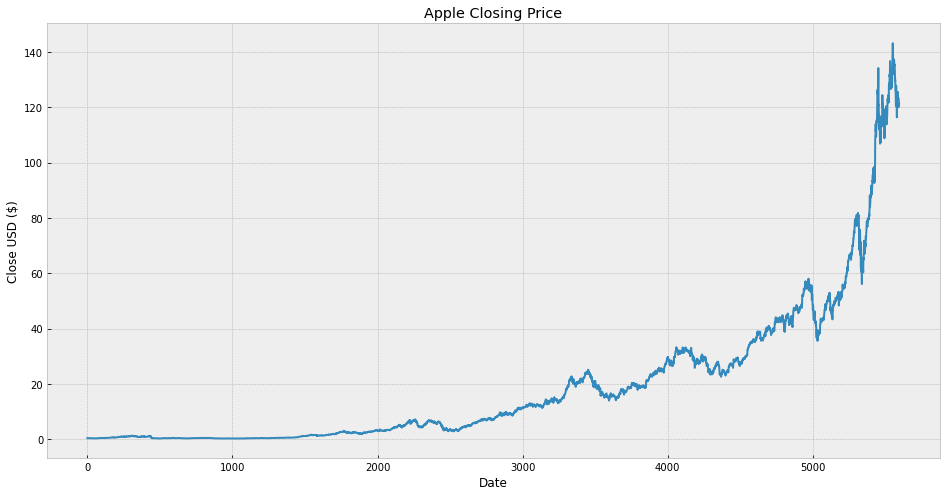

In [50]:
#visualize the figure of AApl stock 
plt.figure(figsize=(16,8))
plt.title('Apple Closing Price')
plt.xlabel('Date')
plt.ylabel('Close USD ($)')
plt.plot(df['Close'])
plt.show()

In [51]:
data = df.filter(['Close'])
data = data.values


In [52]:
training_data_len = math.ceil(len(data)*0.8)
training_data_len

4476

In [53]:
#scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
Data_Scale = scaler.fit_transform(data)
Data_Scale

array([[0.00093768],
       [0.00106652],
       [0.00096891],
       ...,
       [0.84208575],
       [0.84642369],
       [0.84768308]])

In [87]:
#create the training data set
train_data = Data_Scale[0:training_data_len, :]
#make the training data set
##split the data into x_train and y_train
x_train = []
y_train = []
for i in range (90, len(train_data)):
    x_train.append(train_data[i-90:i,0])
    y_train.append(train_data[i,0])

In [88]:
#we have to convert into numpy arrays
x_train, y_train, = np.array(x_train), np.array(y_train)
#reshape the dollar because of the LSTM



In [89]:
x_train.shape

(4386, 90)

In [90]:
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4386, 90)

In [91]:
#build the LSTM Model
model= Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [92]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [100]:
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.layers import LSTM
model.fit(x_train, y_train, epochs= 0, batch_size= 1)

In [107]:
test_data= Data_Scale[training_data_len- 90]
#create datasets for x and y test
#create new array containing scale values between the years of 
x_test = []
y_test = data[training_data_len, :]
for i in range (90, len(test_data)):
    x_test.append(train_data[i-90:i,0])
   

In [60]:
#get the close column 
df= df[['Close']]
df.head(5595)

,Close
0,0.368304
1,0.386719
2,0.372768
3,0.401786
4,0.401786
...,...
5590,122.540001
5591,120.089996
5592,120.589996
5593,121.209999


In [10]:
future_days= 25
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(5595)

,Close,Prediction
0,0.368304,0.332031
1,0.386719,0.342076
2,0.372768,0.353795
3,0.401786,0.336496
4,0.401786,0.342076
...,...,...
5590,122.540001,NaN
5591,120.089996,NaN
5592,120.589996,NaN
5593,121.209999,NaN


In [11]:
#create the data set as an array
x= np.array(df.drop(['Prediction'], 1))[:-future_days]
print(x)

[[  0.368304]
 [  0.386719]
 [  0.372768]
 ...
 [129.710007]
 [129.869995]
 [126.      ]]


In [12]:
#creat the target dataset (y) convert into numpy array get all of the target values except the last 'x ' rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  0.332031   0.342076   0.353795 ... 120.589996 121.209999 121.389999]


In [13]:
#split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20)

In [14]:
#creating the models decesion tree regression 
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr= LinearRegression().fit(x_train, y_train)

In [15]:
#get the last "x" rows of the data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future


array([[127.139999],
       [127.830002],
       [132.029999],
       [136.869995],
       [139.070007],
       [142.919998],
       [143.160004],
       [142.059998],
       [137.089996],
       [131.960007],
       [134.139999],
       [134.990005],
       [133.940002],
       [137.389999],
       [136.759995],
       [136.910004],
       [136.009995],
       [135.389999],
       [135.130005],
       [135.369995],
       [133.190002],
       [130.839996],
       [129.710007],
       [129.869995],
       [126.      ]])

In [16]:
#show the model tree prediction to predict the value 
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[125.860001 125.349998 120.989998 121.260002 127.790001 125.120003
 122.059998 125.120003 121.419998 116.360001 121.089996 119.980003
 121.959999 121.419998 123.989998 125.57     120.529999 120.529999
 119.989998 123.389999 122.540001 120.089996 120.589996 121.209999
 121.389999]

[130.65145023 131.36038306 135.67560456 140.64838306 142.90875112
 146.8643644  147.11095483 145.9807708  140.87441966 135.60369237
 137.84349119 138.71681661 137.63800739 141.18265307 140.53536527
 140.68948968 139.76478945 139.12778422 138.86065743 139.10723142
 136.86743157 134.45295451 133.29196491 133.45634209 129.48017601]


<ipython-input-20-8e451539b18c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


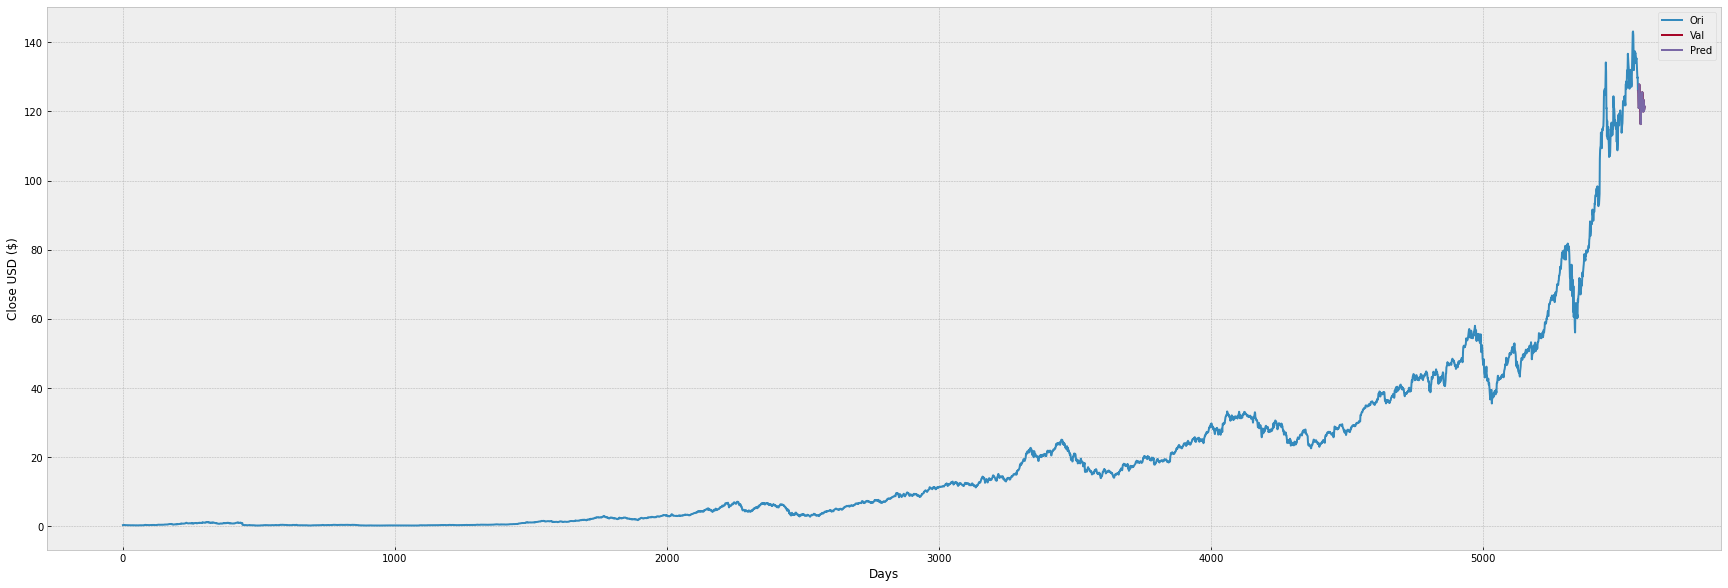

In [20]:
#visualizations
predictions = tree_prediction
valid = df[x.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize = (30,10))
plt.title =('Model')
plt.xlabel('Days')
plt.ylabel('Close USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Ori', 'Val', 'Pred'])
plt.show()

<ipython-input-21-4764ff5e7c0f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


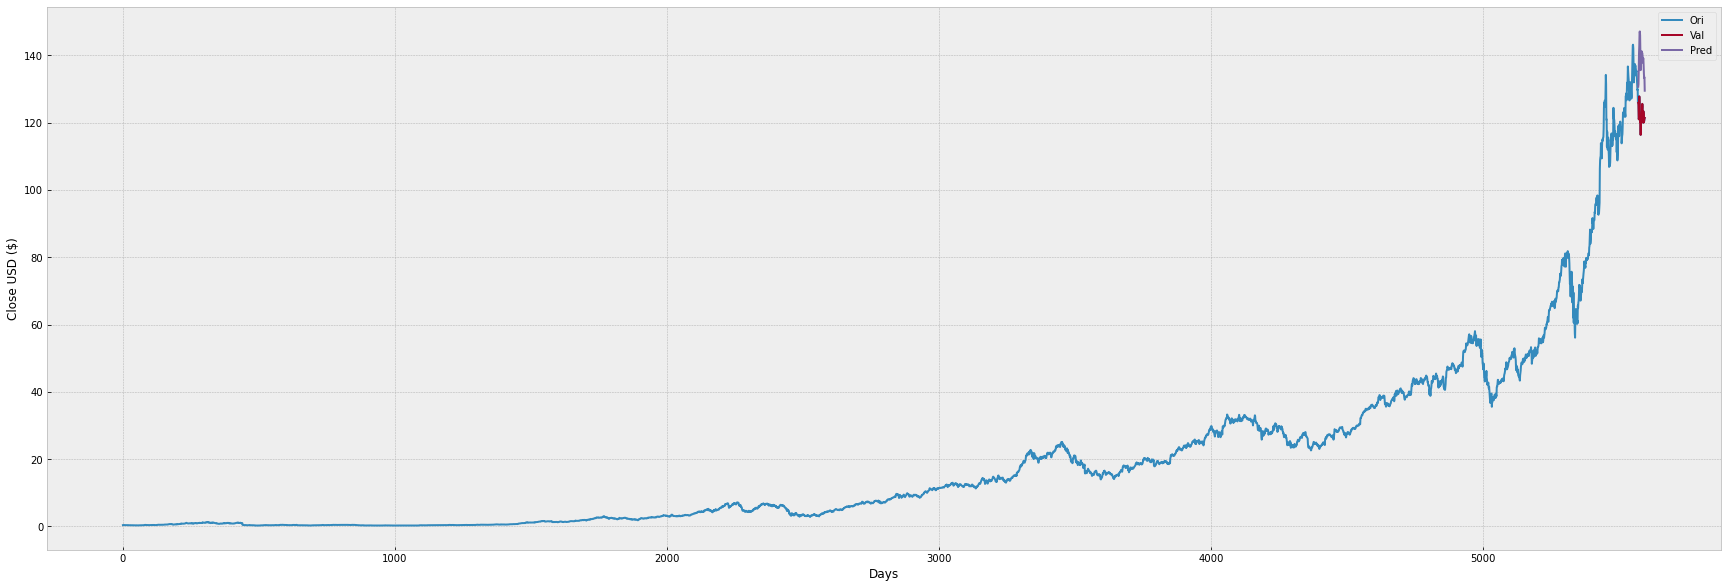

In [21]:
#visualizations
predictions = lr_prediction
valid = df[x.shape[0]:]
valid['Predictions'] = predictions

plt.figure(figsize = (30,10))
plt.title =('Model')
plt.xlabel('Days')
plt.ylabel('Close USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Ori', 'Val', 'Pred'])
plt.show()